In [24]:
import numpy as np
import pandas as pd
from tslearn.clustering import TimeSeriesKMeans
from tslearn.preprocessing import TimeSeriesScalerMeanVariance
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# קריאה והכנת הנתונים
df = pd.read_csv('Multi_df.csv')


# חישוב המרחק בין זריקות, כולל מרחק אפס כאשר מתחיל סשן חדש (ClusterID משתנה)
df['Distance'] = np.sqrt((df['OriginX'].diff())**2 + (df['OriginY'].diff())**2)

# כאשר ה-ClusterID משתנה, המרחק יהיה אפס
df.loc[df['ClusterID'].diff() != 0, 'Distance'] = 0

# חישוב מרחק מצטבר בתוך כל סשן (קבוצה)
df['Cumulative_Distance'] = df.groupby('ClusterID')['Distance'].cumsum()

# שמירת הטבלה המעודכנת לקובץ חדש
df.to_csv('ORIGINS_shot_data.csv', index=False)


C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


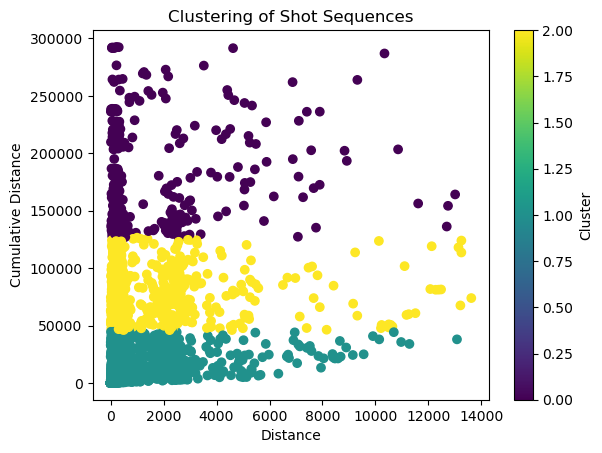

In [30]:


# ביצוע קלאסטרינג עם K-means
kmeans = KMeans(n_clusters=3, random_state=42)  # ניתן לשנות את מספר הקבוצות בהתאם לצורך
df['Cluster'] = kmeans.fit_predict(features)

# ויזואליזציה של התוצאות
plt.scatter(df['Distance'], df['Cumulative_Distance'], c=df['Cluster'], cmap='viridis')
plt.xlabel('Distance')
plt.ylabel('Cumulative Distance')
plt.title('Clustering of Shot Sequences')
plt.colorbar(label='Cluster')
plt.show()


C:\Users\User\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


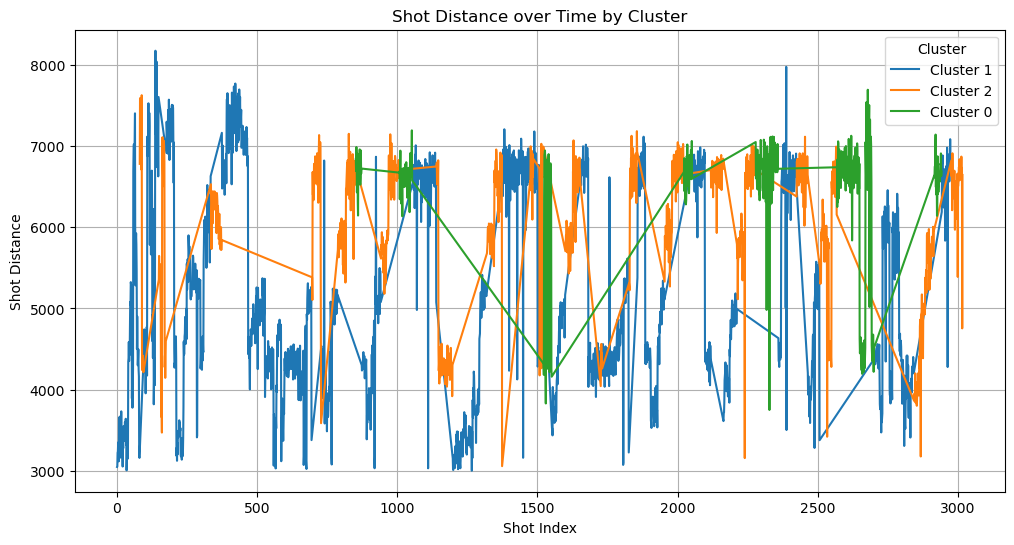

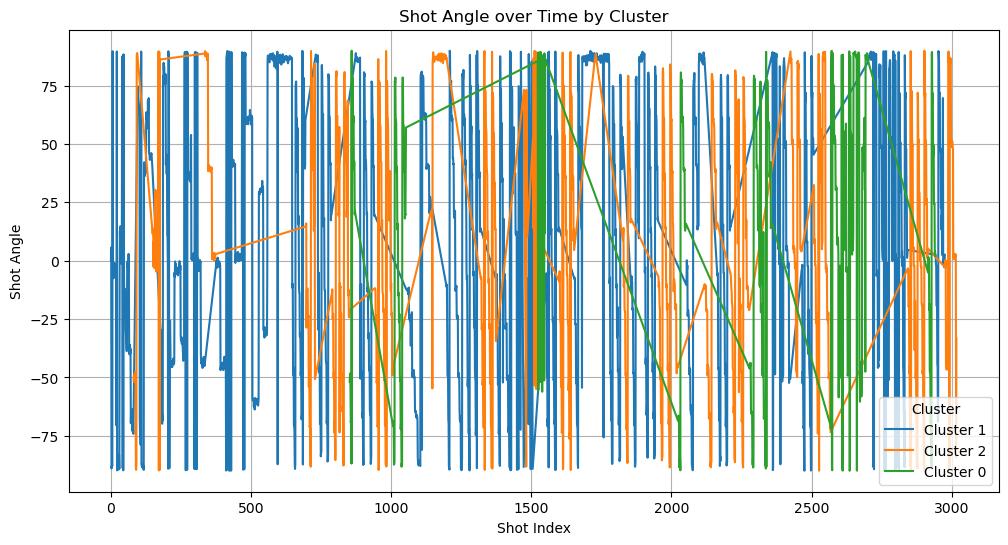

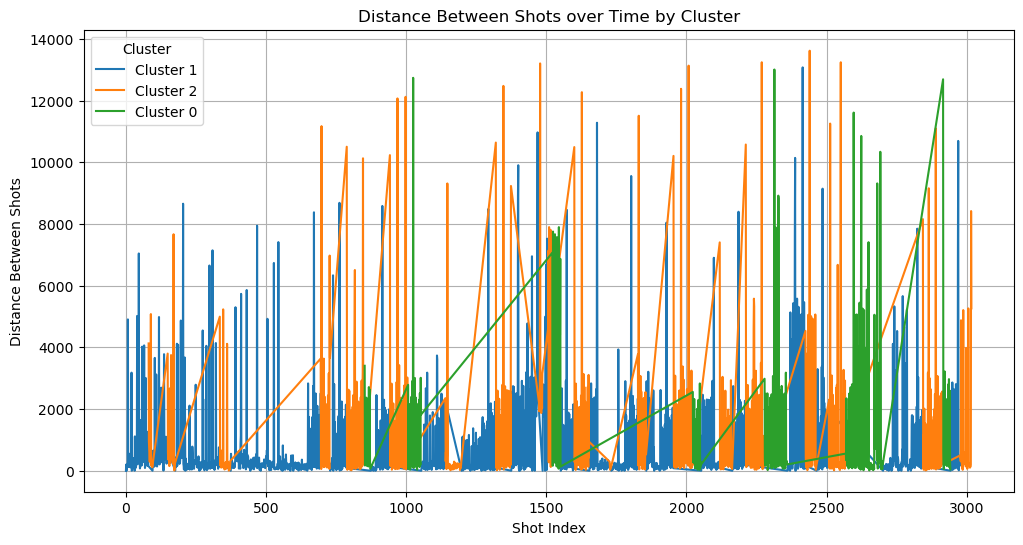

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# קריאת הנתונים מקובץ ה-CSV המעודכן עם הקלאסטרים
df = pd.read_csv('ORIGINS_shot_data.csv')

# הוספת הקלאסטרים לנתונים לפי הקוד הקודם
features = df[['Distance', 'Cumulative_Distance', 'ShotDistance', 'ShotAngle']]
optimal_k = 3  # בחירת מספר הקבוצות לפי שיטת המרפק מהגרף הקודם
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df['Cluster'] = kmeans.fit_predict(features)

# ויזואליזציה 1: מרחק הזריקה מהסל לאורך הזריקות
plt.figure(figsize=(12, 6))
for cluster in df['Cluster'].unique():
    subset = df[df['Cluster'] == cluster]
    plt.plot(subset.index, subset['ShotDistance'], label=f'Cluster {cluster}')
plt.xlabel('Shot Index')
plt.ylabel('Shot Distance')
plt.title('Shot Distance over Time by Cluster')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

# ויזואליזציה 2: זווית הזריקה לאורך הזריקות
plt.figure(figsize=(12, 6))
for cluster in df['Cluster'].unique():
    subset = df[df['Cluster'] == cluster]
    plt.plot(subset.index, subset['ShotAngle'], label=f'Cluster {cluster}')
plt.xlabel('Shot Index')
plt.ylabel('Shot Angle')
plt.title('Shot Angle over Time by Cluster')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

# ויזואליזציה 3: מרחק בין זריקות לאורך הזריקות
plt.figure(figsize=(12, 6))
for cluster in df['Cluster'].unique():
    subset = df[df['Cluster'] == cluster]
    plt.plot(subset.index, subset['Distance'], label=f'Cluster {cluster}')
plt.xlabel('Shot Index')
plt.ylabel('Distance Between Shots')
plt.title('Distance Between Shots over Time by Cluster')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()
